# Aim: To plot Feature importance using SHAP Value

## Data is of the 9 important features of the combined data

In [3]:
import shap
import numpy as np
import pandas as pd
from matplotlib import colors
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split

%cd Z:\PPMI_Data\Excels\NonMotors\The251\Files

Z:\PPMI_Data\Excels\NonMotors\The251\Files


In [4]:
# Load data
df = pd.read_csv('Any2Common_inAll45Feats_Data.csv')
df = df.drop('PATNO', axis = 1)
df['APPRDX'] = df['APPRDX'] - 1
df.head(2)

,APPRDX,MDS_Apathy,MDSP_Fatigue,Montreal_Cognitive,REM_Dream,SCOPA_Gastro,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,1,0,2,1,1,2,1,2
1,0,1,1,0,2,0,1,0,0,2


In [5]:
# Split features and target
X = df.drop('APPRDX', axis = 1)
y = df['APPRDX']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Train XGBClassifier
xgb_model = XGBClassifier(n_estimators = 1000, max_depth = 10, learning_rate = 0.001, random_state = 1)
xgb_model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [6]:
# Calculate mean absolute SHAP value for each feature (like summary_plot bar)
feature_importance = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'MeanAbsSHAP': feature_importance
})

# Sort by importance (optional)
importance_df = importance_df.sort_values(by='MeanAbsSHAP', ascending=False)

# Save to CSV
importance_df.to_csv('SHAP_Feature_Importance_Combined.csv', index=False)

## Feature Importance Plot 

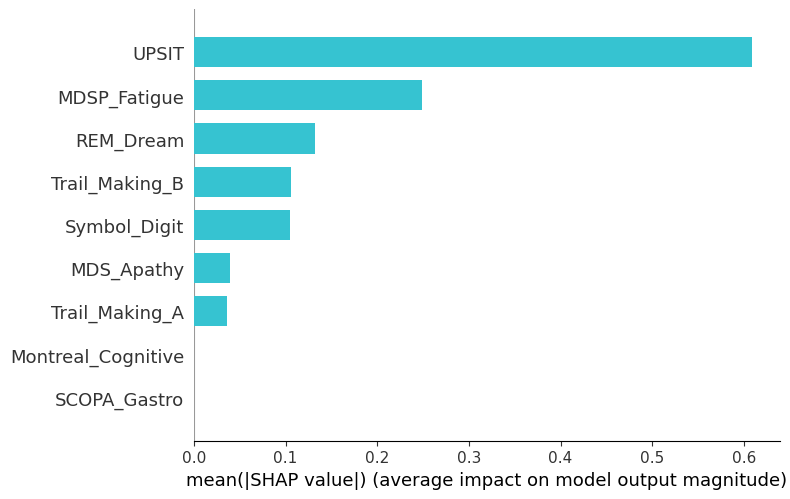

In [7]:
# Plot feature importance
shap.summary_plot(shap_values, X_train, plot_type = "bar", color='#36C3D1')

In [43]:
# Create the SHAP plot and save
plt.figure(figsize=(12, 6))  # Optional: Set figure size for better proportions
shap.summary_plot(shap_values, X_train, plot_type = "bar", color='#36C3D1', show=False)

# Adjust layout and save
plt.tight_layout()
plt.savefig('SHAP_FeatureImp_9_Impfeat.svg', format='svg')
plt.savefig('SHAP_FeatureImp_9_Impfeat.pdf', format='pdf')
plt.close()

## Beeswarm Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


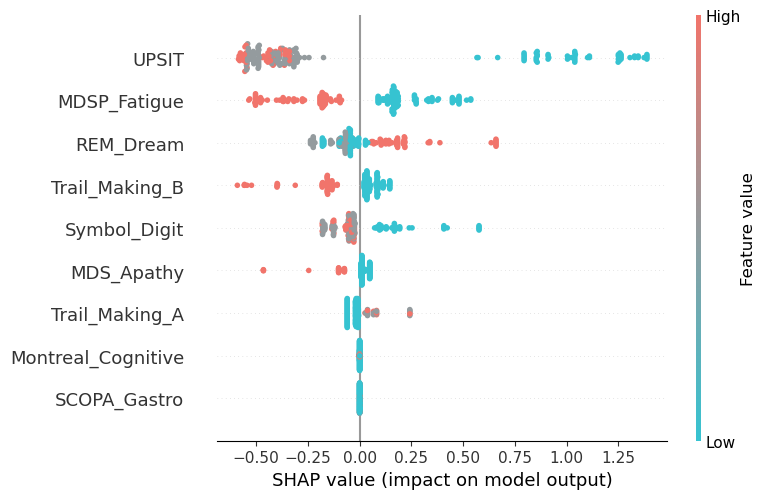

In [8]:
# Create a custom two-color gradient
custom_cmap = colors.LinearSegmentedColormap.from_list("custom_gradient", ['#36C3D1', '#F1746B'])

shap.summary_plot(shap_values, features = X_train, feature_names = X_train.columns, cmap = custom_cmap)

In [35]:
# Create the SHAP plot and save
plt.figure(figsize=(10, 6))  # Optional: Set figure size for better proportions
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, cmap=custom_cmap, show=False)

# Adjust layout and save
plt.tight_layout()
plt.savefig('SHAP_Beeswarm_9_Impfeat.svg', format='svg', bbox_inches='tight')
plt.savefig('SHAP_Beeswarm_9_Impfeat.pdf', format='pdf', bbox_inches='tight')
plt.close()